<a href="https://colab.research.google.com/github/ShaikSony-07/data-analytics-project/blob/main/Doctor_visit_analysis_using_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Doctor visit analysis using python**

In [1]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

Load the data from a csv **file**

In [2]:
df=pd.read_excel(r'/DoctorVisits (2).xlsx')

In [13]:
df.head()

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5190 non-null   int64  
 1   visits      5190 non-null   int64  
 2   gender      5190 non-null   object 
 3   age         5190 non-null   float64
 4   income      5190 non-null   float64
 5   illness     5190 non-null   int64  
 6   reduced     5190 non-null   int64  
 7   health      5190 non-null   int64  
 8   private     5190 non-null   object 
 9   freepoor    5190 non-null   object 
 10  freerepat   5190 non-null   object 
 11  nchronic    5190 non-null   object 
 12  lchronic    5190 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 527.2+ KB


In [15]:
df.describe()

,Unnamed: 0,visits,age,income,illness,reduced,health
count,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000
mean,2595.500000,0.301734,0.406385,0.583160,1.431985,0.861850,1.217534
std,1498.368279,0.798134,0.204782,0.368907,1.384152,2.887628,2.124266
min,1.000000,0.000000,0.190000,0.000000,0.000000,0.000000,0.000000
25%,1298.250000,0.000000,0.220000,0.250000,0.000000,0.000000,0.000000
50%,2595.500000,0.000000,0.320000,0.550000,1.000000,0.000000,0.000000
75%,3892.750000,0.000000,0.620000,0.900000,2.000000,0.000000,2.000000
max,5190.000000,9.000000,0.720000,1.500000,5.000000,14.000000,12.000000


In [17]:
df["income"]=df["income"]*10000

In [18]:
df["gender"].value_counts()

female    2702
male      2488
Name: gender, dtype: int64

**clean up the data**

**Drop the 'Unnamed: 0' column
**

In [20]:
df.drop('Unnamed: 0', axis=1, inplace=True)


**# Convert the 'gender' column to lowercase**

In [21]:
df['gender'] = df['gender'].str.lower()


**Convert the 'age' column to integer
**

In [22]:
df['age'] = df['age'].astype(int)


**Convert the 'income' column to integer
**

In [23]:
df['income'] = df['income'].astype(int)


**# Convert the 'private' column to boolean
**

In [24]:
df['private'] = df['private'].map({'Yes': True, 'No': False})


**Convert the 'freepoor' column to boolean
**

In [25]:
df['freepoor'] = df['freepoor'].map({'Yes': True, 'No': False})


In [26]:
# Convert the 'freerepat' column to boolean
df['freerepat'] = df['freerepat'].map({'Yes': True, 'No': False})

In [29]:
# Convert the 'lchronic' column to integer
df['lchronic'] = df['lchronic'].map({'Yes': True, 'No': False})


In [31]:
# Convert the 'nchronic' column to integer
df['nchronic'] = df['nchronic'].map({'Yes': True, 'No': False})

print(df.head())

   visits  gender  age  income  illness  reduced  health private freepoor  \
0       1  female    0    5500        1        4       1     NaN      NaN   
1       1  female    0    4500        1        2       1     NaN      NaN   
2       1    male    0    9000        3        0       0     NaN      NaN   
3       1    male    0    1500        1        0       0     NaN      NaN   
4       1    male    0    4500        2        5       1     NaN      NaN   

  freerepat nchronic lchronic  
0       NaN      NaN      NaN  
1       NaN      NaN      NaN  
2       NaN      NaN      NaN  
3       NaN      NaN      NaN  
4       NaN      NaN      NaN  


In [37]:
import pandas as pd

# Convert the DataFrame values to numeric types
df = df.apply(pd.to_numeric, errors='coerce')

# Filter the DataFrame based on the condition
df = df[(df >= 0).all(1)]

# Save the filtered DataFrame to a new Excel file
df.to_csv('DoctorVisits (2).xlsx', index=False)

**Analyze the data**

In [32]:
total_visits = len(df)
total_illnesses = df['illness'].sum()
total_reduced = df['reduced'].sum()
total_health = df['health'].sum()
total_private = df[df['private'] == True]['private'].count()
total_freepoor = df[df['freepoor'] == True]['freepoor'].count()
total_freerepat = df[df['freerepat'] == True]['freerepat'].count()
average_age = df['age'].mean()
average_income = df['income'].mean()

print('Total Visits:', total_visits)
print('Total Illnesses:', total_illnesses)
print('Total Reduced Mobility:', total_reduced)
print('Total Good Health:', total_health)
print('Total Private Insurance:', total_private)
print('Total Free Poor:', total_freepoor)
print('Total Free Repatriated:', total_freerepat)
print('Average Age:', average_age)
print('Average Income:', average_income)

Total Visits: 5190
Total Illnesses: 7432
Total Reduced Mobility: 4473
Total Good Health: 6319
Total Private Insurance: 0
Total Free Poor: 0
Total Free Repatriated: 0
Average Age: 0.0
Average Income: 5831.599229287091


**Visualisation of data**

array([[<Axes: title={'center': 'visits'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'illness'}>],
       [<Axes: title={'center': 'reduced health'}>,
        <Axes: title={'center': 'private'}>]], dtype=object)

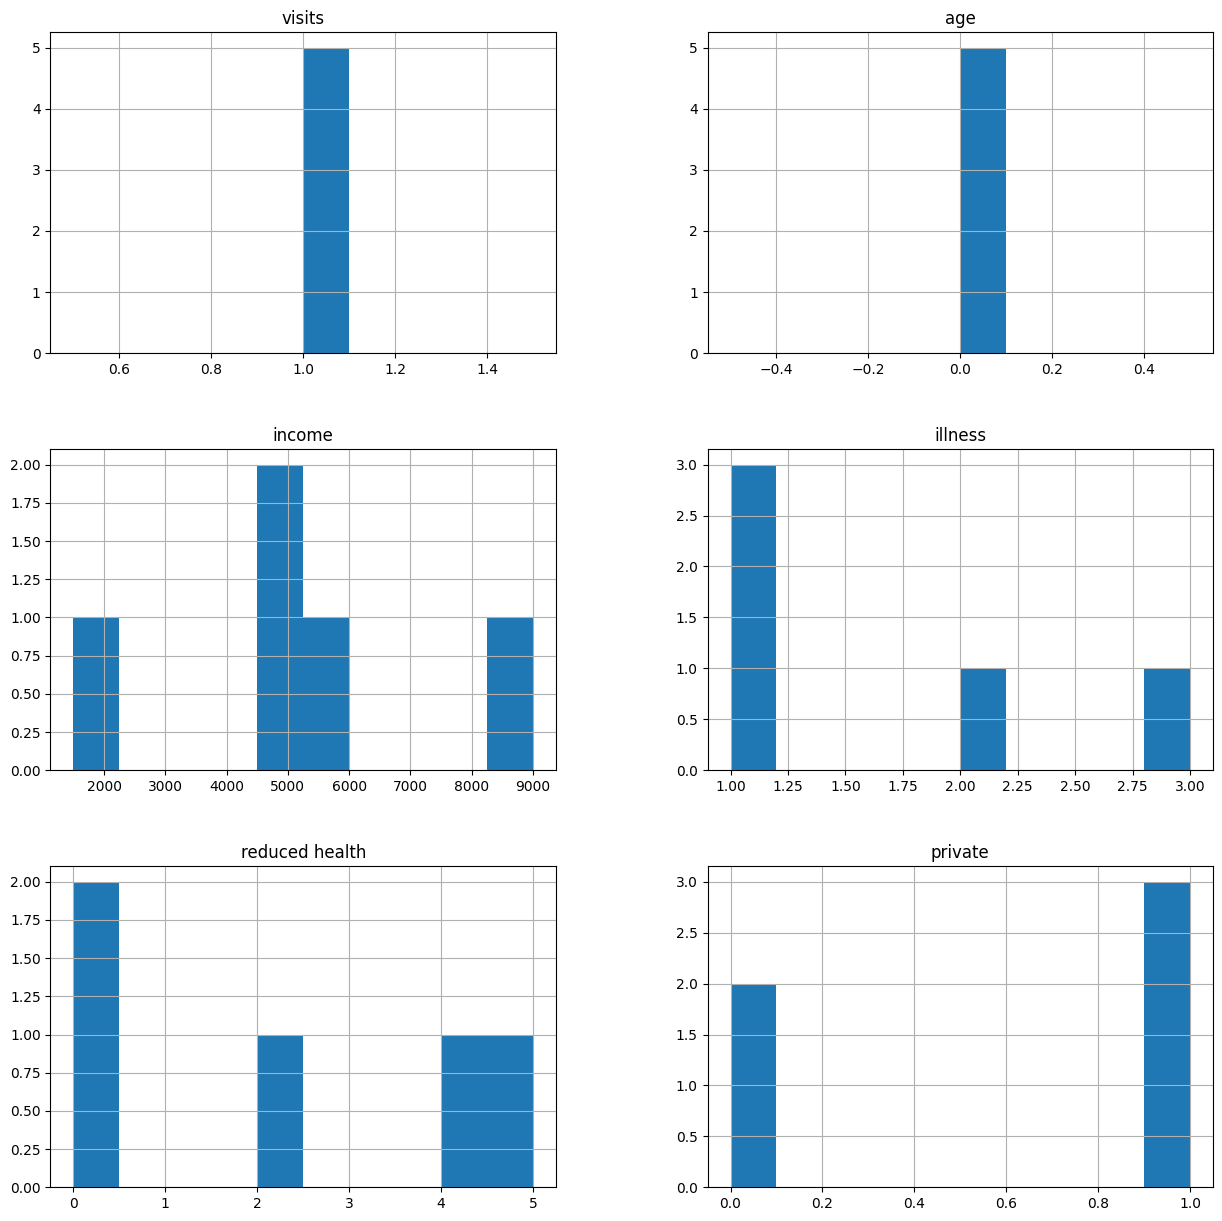

In [62]:
df.hist(figsize=(15,15))

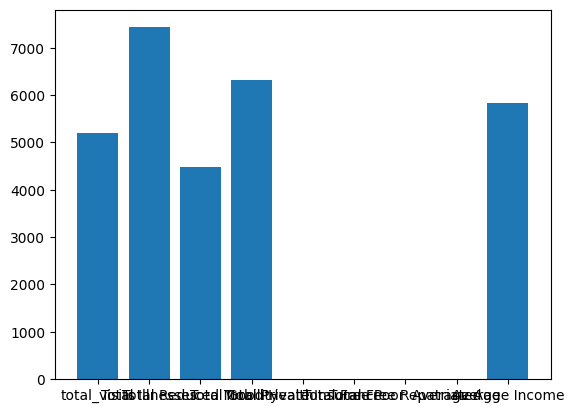

In [66]:
import matplotlib.pyplot as plt

total_visits=5190
total_illnesses = 7432
total_reduced = 4473
total_health = 6319
total_private = 0
total_freepoor = 0
total_freerepat = 0
average_age = 0.0
average_income = 5831.599229287091

labels = ['total_visits','Total Illnesses', 'Total Reduced Mobility', 'Total Good Health', 'Total Private Insurance', 'Total Free Poor', 'Total Free Repatriated', 'Average Age', 'Average Income']
values = [total_visits, total_illnesses, total_reduced, total_health, total_private, total_freepoor, total_freerepat, average_age, average_income]

plt.bar(labels, values)
plt.show()
